# 1. State Problem

## 1.1 Problem and Pain Point
- **Wasted Time & Material**
การพิมพ์ 3D ที่ล้มเหลวโดยเฉพาะอย่างยิ่งงานพิมพ์ขนาดใหญ่ที่ใช้เวลานาน ทำให้ต้องเสียเวลาหลายชั่วโมงและวัสดุ (Filament) จำนวนมากโดยเปล่าประโยชน์ การตรวจจับด้วยตามนุษย์ทำได้ยากและไม่สามารถทำได้ตลอด 24 ชั่วโมง
ปัญหาความล้มเหลวในการพิมพ์เป็นสาเหตุหลักของการ สูญเสียเวลา วัสดุ และพลังงาน ในอุตสาหกรรม (Circuit Digest, SimplyPrint)
- **Lack of Remote Monitoring**
ผู้ใช้งานไม่สามารถ "เฝ้าดู" เครื่องพิมพ์ได้ตลอดเวลาเมื่ออยู่นอกสถานที่ (เช่น ขณะหลับ, ทำงาน) ทำให้ไม่สามารถหยุดงานพิมพ์ที่ล้มเหลวได้ทันท่วงที
โซลูชันเดิมอย่าง OctoPrint มีข้อจำกัดในการเข้าถึงระยะไกล ทำให้ผู้ใช้ต้องพึ่งพาระบบคลาวด์/AI เพื่อควบคุมจากภายนอกเครือข่าย (Obico, SimplyPrint)
- **Lack of Universal Compatibility (ขาดความเข้ากันได้แบบสากล)**
ผู้ใช้งานที่มีเครื่องพิมพ์ 3D ที่ได้รับความนิยมในตลาดโลกจำนวนมหาศาล ซึ่งถูกจำกัดด้วยราคาในบางรายที่ไม่งบประมาณไม่ถึงพอที่จะสามารถซื้อเครื่องพิมพ์ 3D ที่มี AI ในการตรวจจับที่ตัวเครื่องอยู่แล้ว
โปรเจคนี้จึงเป็น “สะพานเชื่อม” ให้เครื่องพิมพ์รุ่นเก่า/ยี่ห้ออื่น ๆ สามารถเข้าถึงฟังก์ชันตรวจสอบ Error นี้ได้โดยไม่ต้องเปลี่ยนเครื่อง


ดังนั้นกลุ่มของเราจึงพัฒนาโครงการนี้ขึ้นมาใช้ AI ในการตรวจจับความผิดปกติระหว่างการพิมพ์แบบอัตโนมัติ หากระบบพบการเกิด spaghetti fail หรือรูปแบบการพิมพ์ที่ผิดปกติ ระบบจะสามารถแจ้งเตือนผู้ใช้ให้เข้ามาแก้ไขได้ทันที และช่วยลดการสูญเสียวัสดุ เวลาพิมพ์


## 1.2 Related Work
- **YOLO-based Object Detection**


	ชื่อวิจัย : A Real-Time Defect Detection Strategy for Additive Manufacturing Processes Based on Deep Learning and Machine Vision Technologies https://pmc.ncbi.nlm.nih.gov/articles/PMC11154342/
  
  จุดเด่นที่เปรียบ : แสดงการใช้ YOLOv8 ซึ่งเป็น Object Detection Model ยอดนิยม ที่สามารถให้ความแม่นยำสูงและรวดเร็ว (91.7% mAP50) ในการตรวจจับข้อบกพร่อง (เป็นทางเลือกในการพัฒนาโมเดลของท่าน)
- **Hyperparameter Tuning for FDM**


	ชื่อวิจัย : Fault Detection in 3D Printers using an Improved YOLOv5 with Hyperparameter Tuning https://www.researchgate.net/publication/358799718_Fault_Detection_in_3D_Printers_using_an_Improved_YOLOv5_with_Hyperparameter_Tuning

  จุดเด่นที่เปรียบ : เน้นการปรับแต่ง (Tuning) โมเดล YOLOv5 โดยเฉพาะให้เข้ากับชุดข้อมูล 3D Printing เพื่อเพิ่มความแม่นยำในการตรวจจับข้อผิดพลาด (ชี้ให้เห็นความสำคัญของ Dataset Specific Training)


- **Model Optimization for Edge**
	ชื่อวิจัย : 3D Printing Anomaly Detection: Implementation of a ML system using YOLOv5 and EfficientNet-Lite https://webthesis.biblio.polito.it/secure/25499/1/tesi.pdf

  จุดเด่นที่เปรียบ : แสดงการใช้ YOLOv5 และ EfficientNet-Lite และ TensorFlow-Lite ซึ่งเป็นเทคนิคการลดขนาดโมเดล เพื่อให้สามารถทำงานแบบ Near Real-Time บน Edge-Devices (เช่น Raspberry Pi) ได้

- **Justification for AI Monitoring**
	ชื่อวิจัย : AI Failure Detection in 3D Printing https://www.obico.io/blog/ai-failure-detection-in-3d-printing/

	จุดเด่นที่เปรียบ : ระบุโดยตรงว่าข้อได้เปรียบหลักของการตรวจจับข้อผิดพลาดด้วย AI คือ การลดวัสดุเหลือทิ้ง (Material Waste), ประหยัดเวลาและเงิน (Save Time and Money), และ เพิ่มอัตราความสำเร็จ (Success Rate) ของงานพิมพ์ 3D
- **Inherent Limitations**
	ชื่อวิจัย : [Bug] Spaghetti detection needs work - GitHub & Experiences with AI Spaghetti detection - Forum https://github.com/bambulab/BambuStudio/issues/1007

	จุดเด่นที่เปรียบ : ข้อจำกัดในโลกจริง: ผู้ใช้งานรายงานปัญหา False Positives (แจ้งเตือนผิดพลาด) โดยเฉพาะอย่างยิ่งในการพิมพ์เลเยอร์แรก หรือเมื่อมีแสงไฟภายนอกมารบกวน และ Dark Filament (ไส้สีเข้ม) มักจะทำให้ประสิทธิภาพลดลง
- **Machine Learning / Computer Vision, Firebase, Raspberry Pi**
	ชื่อวิจัย : An Intelligent Program To Monitor 3d Printing And Detect Failures Using Computer Vision And Machine Learning (ปีที่พิมพ์ 2021) https://aircconline.com/csit/papers/vol13/csit130713.pdf  

	จุดเด่นที่เปรียบ : นำเสนอแนวคิดการใช้ Raspberry Pi และการส่งภาพไปประมวลผลบน Online Database เพื่อตรวจจับความล้มเหลว (Spaghetti Messes) ซึ่งสอดคล้องกับสถาปัตยกรรม Cloud Inference ของโปรเจกต์ท่าน  



- **Research Gap**

จากการศึกษา พบว่าโมเดลของ Zhang et al. (2022) สามารถตรวจจับข้อผิดพลาดของการพิมพ์ 3 มิติได้อย่างแม่นยำสูงถึง **97%**  
ขณะที่โมเดลที่พัฒนาในงานนี้ ซึ่งใช้สถาปัตยกรรม **YOLOv8** สำหรับการตรวจจับความล้มเหลวของเส้นสปาเกตตี (spaghetti failed detection) มีความแม่นยำเฉลี่ยเพียง **90%**  

ทั้งนี้ สาเหตุหนึ่งที่ทำให้ความแม่นยำของโมเดลต่ำกว่าอาจเกิดจาก **ข้อจำกัดของชุดข้อมูล (Dataset)** ที่กลุ่มของเราเก็บจาก **เครื่องพิมพ์ 3D เพียงเครื่องเดียว และใช้เส้นใย (filament) สีเดียวตลอดการเก็บข้อมูล** ทำให้โมเดลยังไม่สามารถเรียนรู้ความหลากหลายของรูปแบบความผิดพลาดได้เต็มที่ ซึ่งเป็นช่องว่างสำคัญที่ควรพัฒนาเพิ่มเติมในอนาคต เพื่อให้โมเดลสามารถตรวจจับข้อผิดพลาดได้หลากหลายสภาพแวดล้อมมากขึ้น



## 1.3 Unique Method
เป็นอุปกรณ์เสริมขนาดเล็กที่ใช้กล้องตรวจสอบเส้นสปาเกตตีระหว่างการพิมพ์ของเครื่อง 3D Printer แบบเรียลไทม์ สามารถทำงานได้แม้บนอุปกรณ์สเปกต่ำ รองรับเครื่องพิมพ์ทุกรุ่น และช่วยให้ผู้ใช้สามารถตรวจจับความผิดพลาดได้ทันทีเพื่อป้องกันความเสียหายของชิ้นงาน

# 2. Data Preparation

## 2.1 Data souce
##  2.2 Data Cleaning
##	2.3 Data Transformation
- Horizontal Flip
- Grayscale
- Hue (Randomly adjust between -25% and +25%)
- Saturation (Randomly adjust between -30% and +30%)
- Brightness (Randomly adjust between -20% and +20%)


**data size**: 1037 (x3 of orginal size)

##	2.5 Insight of dataset

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Library version
- python      : 3.12.11
- ultralytics: 8.3.204
- opencv      : 4.12.0
- matplotlib  : 3.10.0
- seaborn     : 0.13.2
- pandas      : 2.2.2
- numpy       : 2.0.2
- torch       : 2.8.0+cu126
- scikit-learn: 1.6.1
- os          : builtin, no version
- glob        : builtin, no version
- random      : builtin, no version

In [ ]:
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import torch
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
import os
import ultralytics
import cv2
import matplotlib
import seaborn
import pandas
import numpy
import torch
import sklearn
import sys

print("python      :", sys.version)
print("ultralytics :", ultralytics.__version__)
print("opencv      :", cv2.__version__)
print("matplotlib  :", matplotlib.__version__)
print("seaborn     :", seaborn.__version__)
print("pandas      :", pandas.__version__)
print("numpy       :", numpy.__version__)
print("torch       :", torch.__version__)
print("scikit-learn:", sklearn.__version__)
print("os          : builtin, no version")
print("glob        : builtin, no version")
print("random      : builtin, no version")


python      : 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
ultralytics : 8.3.204
opencv      : 4.12.0
matplotlib  : 3.10.0
seaborn     : 0.13.2
pandas      : 2.2.2
numpy       : 2.0.2
torch       : 2.8.0+cu126
scikit-learn: 1.6.1
os          : builtin, no version
glob        : builtin, no version
random      : builtin, no version


เปลี่ยน working directory

In [ ]:
# Change working directory
os.chdir('/content/drive/MyDrive/spaghetti')

# Check current directory
print("Current dir:", os.getcwd())

Current dir: /content/drive/MyDrive/spaghetti


# 3. Train

## 3.1 YOLOv8
YOLOv8 (You Only Look Once Version 8) เป็นสถาปัตยกรรมการตรวจจับวัตถุ (Object Detection) จุดเด่นของ YOLOv8 คือความสามารถในการตรวจจับวัตถุได้อย่างรวดเร็วและแม่นยำภายในขั้นตอนเดียว (Single-Stage Detector) ทำให้เหมาะกับการใช้งานแบบเรียลไทม์ (Real-time Application)

YOLOv8 มีการออกแบบที่ทันสมัยกว่า YOLOv5–YOLOv7 โดยเพิ่มความยืดหยุ่นและประสิทธิภาพ เช่น  
- **Backbone ที่ปรับปรุงใหม่** → ใช้สถาปัตยกรรม CSP (Cross Stage Partial Network) และ C2f block ซึ่งช่วยให้การดึงคุณลักษณะของภาพ (Feature Extraction) มีประสิทธิภาพสูงขึ้น  
- **Neck และ Head ที่ยืดหยุ่น** → ใช้ PAN-FPN (Path Aggregation Network + Feature Pyramid Network) เพื่อรวมคุณลักษณะจากหลายสเกล ทำให้ตรวจจับวัตถุได้ทั้งขนาดเล็กและใหญ่  
- **Anchor-free detection** → YOLOv8 รองรับ anchor-free ทำให้ลดความซับซ้อนและสามารถเรียนรู้ bounding box ได้ยืดหยุ่นขึ้น  
- **รองรับงานหลายประเภท** → นอกจาก Object Detection ยังรองรับ Image Classification, Instance Segmentation และ Pose Estimation  
- **ประสิทธิภาพสูง** → ทำงานได้รวดเร็วบน GPU, CPU และรองรับการ deploy ไปยัง edge device เช่น Raspberry Pi, Jetson Nano, หรือแม้กระทั่ง Mobile  

ความสามารถเหล่านี้ทำให้ YOLOv8 ได้รับความนิยมอย่างกว้างขวางในงานวิจัยและการประยุกต์ใช้งานจริง เช่น การตรวจจับความผิดปกติในการผลิต, การจราจรอัจฉริยะ, และการตรวจวัดทางการแพทย์ เป็นต้น

**แหล่งที่มา**  
- Ultralytics YOLOv8 Documentation: [https://docs.ultralytics.com](https://docs.ultralytics.com)  
- Jocher, G. (2023). *YOLOv8: State-of-the-art real-time object detection*. Ultralytics Blog  



In [ ]:
# Load the model
model = YOLO("/content/drive/MyDrive/spaghetti/yolov8n.pt")

## 3.2 Hyper Parameter
- **epochs = 100** → จำนวนรอบการเรียนรู้ ยิ่งมากยิ่งเรียนได้ลึก แต่เสี่ยง overfitting ถ้า dataset เล็ก  
- **imgsz = 640** → ขนาดภาพ input; ใหญ่ = แม่นยำขึ้นแต่ใช้เวลาและ VRAM มากขึ้น  
- **batch = 16** → จำนวนภาพต่อรอบอัปเดต; ค่ามากช่วยให้ gradient เสถียร แต่กิน RAM สูง  
- **device = 0** → ใช้ GPU ตัวแรกในการฝึก
- **amp = True** → เปิด mixed precision ฝึกเร็วขึ้นและประหยัด VRAM  
- **seed = 106** → ตั้งค่าให้ผลการเทรนสามารถทำซ้ำได้ (reproducible)  
## 3.3 Model Training
- อัตราส่วนข้อมูล 71:12:17

*YOLO จำเป็นต้องมีชุด validation (val set) เพื่อประเมินผลระหว่างการฝึก และใช้เลือกโมเดลที่มีประสิทธิภาพดีที่สุดในการสร้าง model* `best.pt`



In [ ]:
SEED = 106
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
results = model.train(
    data="/content/drive/MyDrive/spaghetti/attempt 2/3d print detecting_V3.v14i.yolov8/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    device=0,
    amp=True,
    seed=SEED
)

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/spaghetti/attempt 2/3d print detecting_V3.v14i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/spaghetti/yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train12, nbs=64, nms=False, opset=None, optimize=

# Test
## 4.1 Evaluation
### 4.1.1 ความหมายของ Evaluation Metrics

- **Precision** → บอกว่าสัดส่วนของที่โมเดลทำนายว่าเป็นคลาสนั้น ถูกต้องจริงกี่เปอร์เซ็นต์  
- **Recall** → บอกว่าสัดส่วนของที่เป็นคลาสนั้นจริง ๆ โมเดลสามารถตรวจเจอได้กี่เปอร์เซ็นต์  
- **F1-score** → ค่าเฉลี่ยเชิงฮาร์โมนิกระหว่าง Precision และ Recall เพื่อสมดุลทั้งสองด้าน  
- **Support** → จำนวนตัวอย่างจริงของแต่ละคลาสที่อยู่ในชุดทดสอบ  
- **Accuracy** → สัดส่วนของการทำนายที่ถูกต้องทั้งหมดเมื่อเทียบกับจำนวนตัวอย่างทั้งหมด  
- **Macro avg** → ค่าเฉลี่ยแบบไม่ถ่วงน้ำหนักของ Precision, Recall และ F1-score ทุกคลาส  
- **Weighted avg** → ค่าเฉลี่ยแบบถ่วงน้ำหนักตามจำนวนตัวอย่าง (Support) ของแต่ละคลาส  

---

### 4.1.2 การอธิบายผลลัพธ์

- **Accuracy = 0.91**
- **Target Class (Sp)**  
  - **Precision = 0.89**
  - **Recall = 0.85**  
  - **F1-score = 0.87**


In [ ]:
# Evaluate
metrics = model.val(split='test')
class_names = model.names
results_dict = metrics.results_dict

# Extract global metrics
precision = results_dict['metrics/precision(B)']
recall = results_dict['metrics/recall(B)']
map50 = results_dict['metrics/mAP50(B)']
map5095 = results_dict['metrics/mAP50-95(B)']

# ✅ Support from confusion matrix (row sums = GT counts per class)
cm = metrics.confusion_matrix.matrix
support_counts = cm.sum(axis=1).astype(int)

# Per-class metrics
rows = []
for i, name in class_names.items():
    p, r, m50, m5095 = metrics.class_result(i)
    f1 = 2 * (p * r) / (p + r + 1e-16)
    rows.append([name, p, r, f1, support_counts[i]])

df = pd.DataFrame(rows, columns=["Class", "Precision", "Recall", "F1-score", "Support"])

# Summary
total_support = df["Support"].sum()
accuracy = (df["Support"] * df["Recall"]).sum() / total_support if total_support > 0 else 0
macro_avg = df[["Precision","Recall","F1-score"]].mean()
weighted_avg = (df[["Precision","Recall","F1-score"]].T * df["Support"]).T.sum() / total_support

# Append summary rows
summary_rows = [
    ["accuracy", None, None, accuracy, total_support],
    ["macro avg", macro_avg["Precision"], macro_avg["Recall"], macro_avg["F1-score"], total_support],
    ["weighted avg", weighted_avg["Precision"], weighted_avg["Recall"], weighted_avg["F1-score"], total_support]
]
summary_df = pd.DataFrame(summary_rows, columns=df.columns)

report_df = pd.concat([df, summary_df], ignore_index=True)

# Pretty print
print("\nEvaluation Report:\n")
print(report_df.to_string(index=False, float_format="%.4f"))


Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.7±0.1 ms, read: 0.5±0.3 MB/s, size: 232.6 KB)
val: Scanning /content/drive/MyDrive/spaghetti/attempt 2/3d print detecting_V3.v14i.yolov8/test/labels... 176 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 176/176 1.7it/s 1:44
val: New cache created: /content/drive/MyDrive/spaghetti/attempt 2/3d print detecting_V3.v14i.yolov8/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 2.5it/s 4.4s
                   all        176        574      0.928      0.923      0.956      0.764
          normal print        166        187      0.901      0.914      0.974      0.806
          printer head        176        176      0.998          1      0.995       0.96
             spaghetti        145        211      0.887      

## 4.2 Loss rate

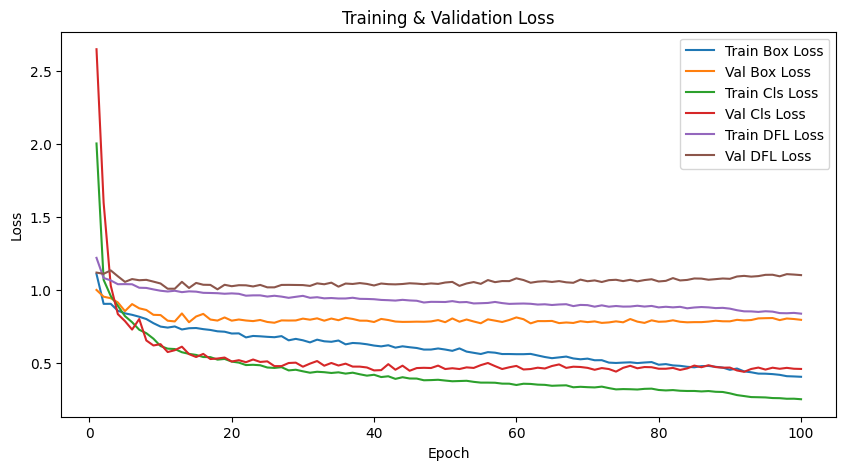

In [ ]:
# trainer.csv auto-save the loss of each epoch
history = pd.read_csv(model.trainer.csv)

plt.figure(figsize=(10,5))
plt.plot(history["epoch"], history["train/box_loss"], label="Train Box Loss")
plt.plot(history["epoch"], history["val/box_loss"], label="Val Box Loss")
plt.plot(history["epoch"], history["train/cls_loss"], label="Train Cls Loss")
plt.plot(history["epoch"], history["val/cls_loss"], label="Val Cls Loss")
if "train/dfl_loss" in history:
    plt.plot(history["epoch"], history["train/dfl_loss"], label="Train DFL Loss")
    plt.plot(history["epoch"], history["val/dfl_loss"], label="Val DFL Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()

## 4.3 Confusion Matrix
การประเมินผล classification model โดยแสดงผลการเปรียบเทียบผลการทำนาย กับค่าจริงในรูปแบบตาราง หรือ heat map


*แถว/คอลัมน์ที่ไม่มีชื่อ class ใน confusion matrix เป็น prediction error ที่ไม่เข้าพวก*

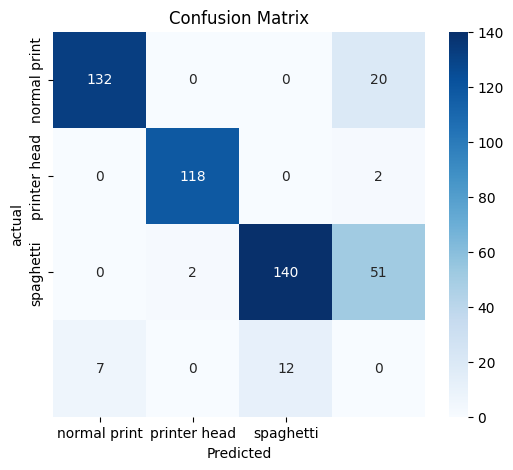

In [ ]:
cm = metrics.confusion_matrix.matrix
labels = list(model.names.values())

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.title("Confusion Matrix")
plt.show()